In [208]:
import numpy as np
import pandas as pd
import math
import lasio
import matplotlib.pyplot as plt  # GRAPHS
%matplotlib inline

In [209]:
las = lasio.read(r"C:\Users\Angelica\Desktop\Tinmiaq_2\registros_T2.las")
las_DM =lasio.read (r"C:\Users\Angelica\Desktop\Tinmiaq_2\DM-2077-4158ft.las")

In [210]:
df_1 = las.df()
df_2 = las_DM.df()
df_2 = df_2[["GR_EDTC",'DTCO']]
Depth= las_DM.index
df_1 = df_1[["GR_EDTC", "RHOZ", "DEPTH","AT90","NPHI"]]
df_1['Vsh'] = (df_1.GR_EDTC - 30) / (120 - 30)
df_1['Vclay']=((0.6)*df_1.Vsh) 
mud_density=1.13835   #en g/cc
sand_density=2.65
assumed_density_Vsh=2.75

grain_density=(df_1.Vsh*assumed_density_Vsh+(1-df_1.Vsh)*sand_density)
df_1['porosity']=(grain_density-df_1.RHOZ)/(grain_density-mud_density)

In [211]:
dt = 2800
bt=3800
temp=((0.0198*df_1.DEPTH)+ 26.921)
v= 400000
b=0.88
tsup= 25
WS=18000
RWs= (v/tsup/WS)**b
tf=temp
Kt1=6.77
df_1['RW2']=(RWs*(tsup+Kt1))/(temp+Kt1)

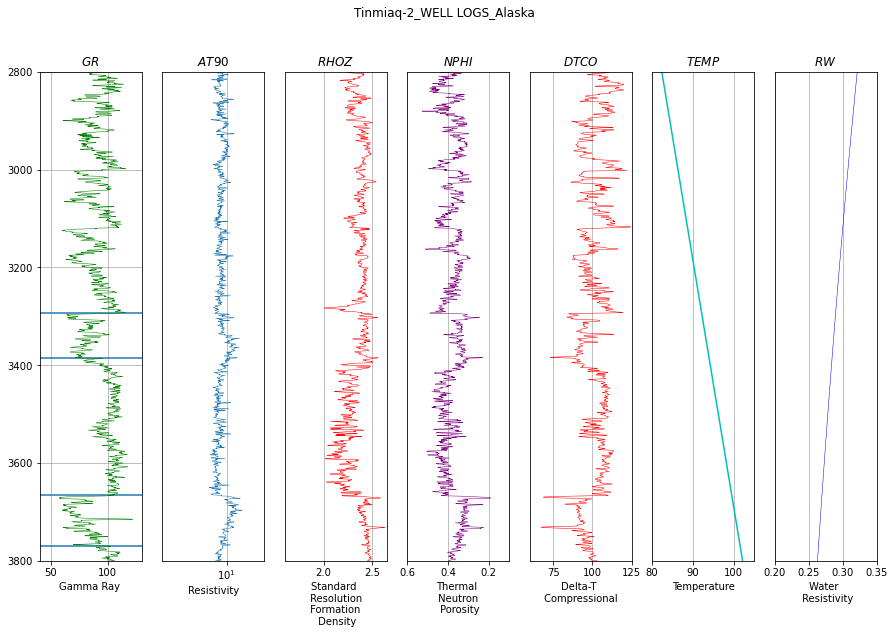

In [212]:
plt.figure(figsize=(15,9))
plt.subplot(171)
plt.plot(df_1.GR_EDTC,df_1.DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130, dt,bt])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3769.49, xmin=0, xmax=130)

plt.hlines(y=3292.25, xmin=0, xmax=130)
plt.hlines(y=3384.75, xmin=0, xmax=130)

plt.hlines(y=2346.92, xmin=0, xmax=130)
plt.hlines(y=2500.65, xmin=0, xmax=130)


plt.subplot(172)
plt.plot(df_1.AT90,df_1.DEPTH,lw=0.5)
plt.axis([0.19, 100, dt,bt])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(173)
plt.plot(df_1.RHOZ,df_1.DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65, dt,bt])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(174)
plt.plot(df_1.NPHI,df_1.DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1, dt,bt])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(175)
plt.plot(df_2.DTCO,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125, dt,bt])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(176)
plt.plot(temp,df_1.DEPTH,'c')
plt.axis([80, 105, dt,bt])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(177)
plt.plot(df_1.RW2,df_1.DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.2, 0.35, dt,bt])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)



plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

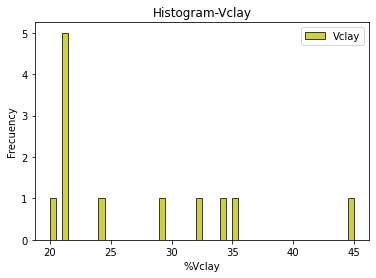

In [213]:
xls = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Difraction')
prof=xls['Depth (ft)']
clays=xls['Clays']

xls1 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Routine Core')
long=xls1['depth']
poro=xls1['Porosity']
grain=xls1['Grain Density']
sw_core=xls1['tracer adjust water (sw)']
minimo=(min(grain))
maximo=(max(grain))
c=2.65
d=2.75
norm=(((grain-minimo)*(d-c)/(maximo-minimo))+c)

xls2 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Core Gamma')
h=xls2['DEPTH']
cg=xls2['Core Gamma']
cg1=xls2['core']

xls3 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='XRD_%Vol')
cl=xls3['Clays']
dp=xls3['Depth (ft)']
plt.hist(cl,bins=50,facecolor='y',alpha=0.75,ec='black', label="Vclay")
plt.title('Histogram-Vclay')
plt.xlabel('%Vclay')
plt.ylabel('Frecuency')
plt.legend()

In [214]:
## SW_Archie
## SW=((a*Rw)/(Rt*(Por)^m))^(1/n)
## Rt= df_1.AT90
## Rw= df_1.RW2
a=1
m=2
n=2
sup=(a* df_1.RW2)
down=(((df_1.porosity)**m)*df_1.AT90)
df_1['Sw_a'] =((sup/down)**(1/n))
df_1['Sw_a1']=np.where(df_1.Sw_a>1,1,df_1.Sw_a)

In [215]:
xls4 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='SW')
SW_archie=xls4['Sw_Archie']
PROF=xls4['DEPTH']
ar=xls4['Sw_a']

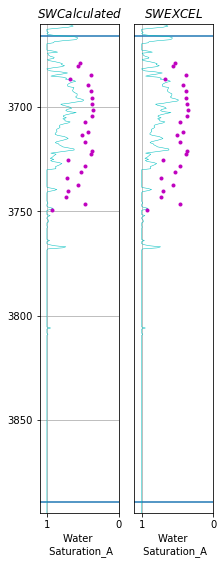

In [216]:
top=3660
bottom=3895
plt.figure(figsize=(15,9))
plt.subplot(191)
plt.plot (df_1.Sw_a1,df_1.DEPTH,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW Calculated$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(192)
plt.plot (ar,PROF,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW EXCEL$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


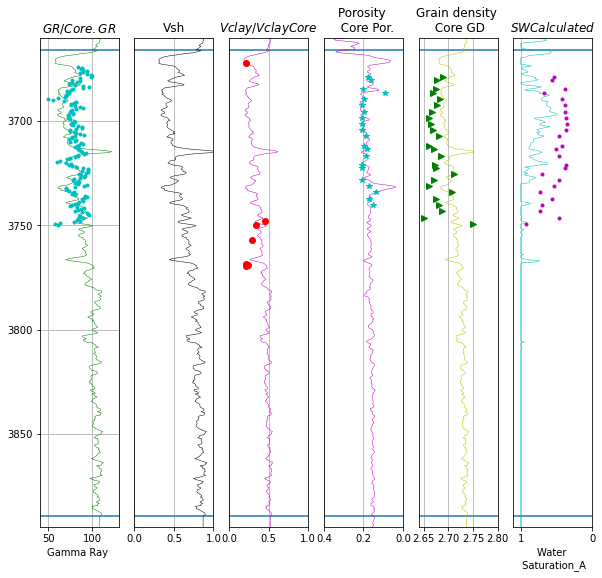

In [217]:
plt.figure(figsize=(15,9))
plt.subplot(191)
plt.plot (df_1.GR_EDTC,df_1.DEPTH,'g',cg1,(h+3),'c.',lw=0.5)
plt.title('$GR/ Core.GR $')
plt.axis([40,130,top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(192)
plt.title('Vsh')
plt.plot (df_1.Vsh,df_1.DEPTH,'black',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(193)
plt.title('$Vclay/Vclay Core$')
plt.plot (df_1.Vclay,df_1.DEPTH,'m',clays,(prof+3),'ro',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(194)
plt.title('Porosity \n  Core Por.')
plt.plot (df_1.porosity,df_1.DEPTH,'m',poro,(long+3),'c*',lw=0.5)
plt.axis([0, 0.4, top,bottom])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(195)
plt.title('Grain density \n Core GD')
plt.plot (grain_density,df_1.DEPTH,'y',norm,(long+3),'g>',lw=0.5)
plt.axis([2.64, 2.8, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(196)
plt.plot (df_1.Sw_a1,df_1.DEPTH,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW Calculated$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


In [218]:
df_1 = df_1.loc[(df_1.DEPTH>=3660) &  (df_1.DEPTH<=3720)]
df_1 = df_1[['DEPTH','AT90', 'RHOZ', 'Vsh','porosity', 'Sw_a', 'Sw_a1']]
df_1.head()

,DEPTH,AT90,RHOZ,Vsh,porosity,Sw_a,Sw_a1
DEPT,,,,,,,
3720.0,3719.9978,15.4225,2.3637,0.423734,0.211498,0.621902,0.621902
3719.5,3719.5034,13.0886,2.3774,0.439180,0.203474,0.701731,0.701731
3719.0,3719.0020,12.2683,2.3998,0.453933,0.189843,0.776892,0.776892
3718.5,3718.4939,12.4818,2.4166,0.521962,0.182624,0.800700,0.800700
3718.0,3718.0015,12.0258,2.4210,0.520298,0.179723,0.828944,0.828944
